# NanoAODplus_analyzer

In [1]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np

from nanoAODplus_processor.AnalyzerProcessor import AnalyzerProcessor

from data.fileset import filesets

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
tstart = time.time()

files = {'Charmonium2017MINIAOD': filesets['Charmonium2017MINIAOD'][0:1], 
           'MuOnia2017MINIAOD': filesets['MuOnia2017MINIAOD'][0:1], 
           'DoubleMuon2017AOD': filesets['DoubleMuon2017AOD'][0:10]
          }

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=AnalyzerProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=10000,
                                 )

elapsed = time.time() - tstart
print(output)


{'mass': <Hist (dataset,mass) instance at 0x7f646dcd3128>, 'pt': <Hist (dataset,pt) instance at 0x7f6462b35ba8>, 'eta': <Hist (dataset,eta) instance at 0x7f6462b53c88>, 'phi': <Hist (dataset,phi) instance at 0x7f6462b538d0>, 'cutflow': defaultdict(<class 'int'>, {'all events': 285185, 'all muons': 1736090, 'soft muon': 1101968, 'global muon': 585703, 'pt cut': 539326, 'eta cut': 538344, 'iso muon': 156620, 'valid vtx': 156610, 'two muons': 44362, 'opposite charge': 42776, 'same vtx': 41576})}


/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(2.5, 12.5)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


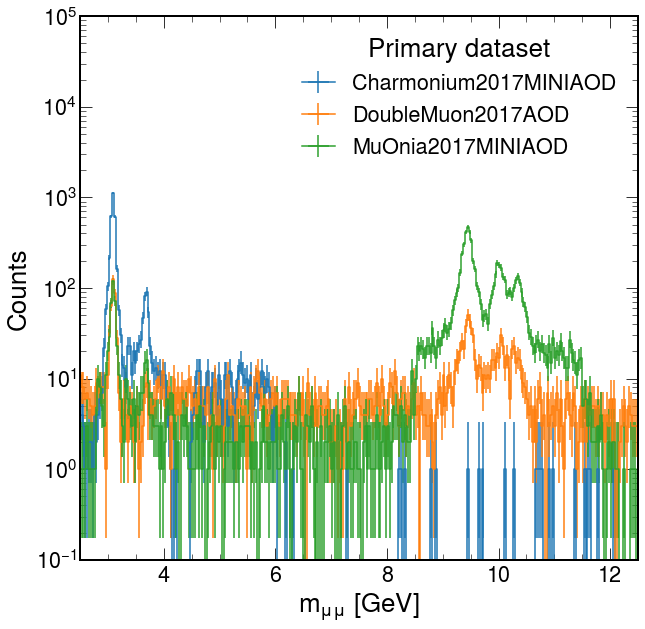

In [3]:
ax = hist.plot1d(output['mass'], overlay='dataset')
ax.set_yscale('log')
ax.set_ylim(0.1,1e5)
ax.set_xlim(2.5,12.5)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0, 10.0)

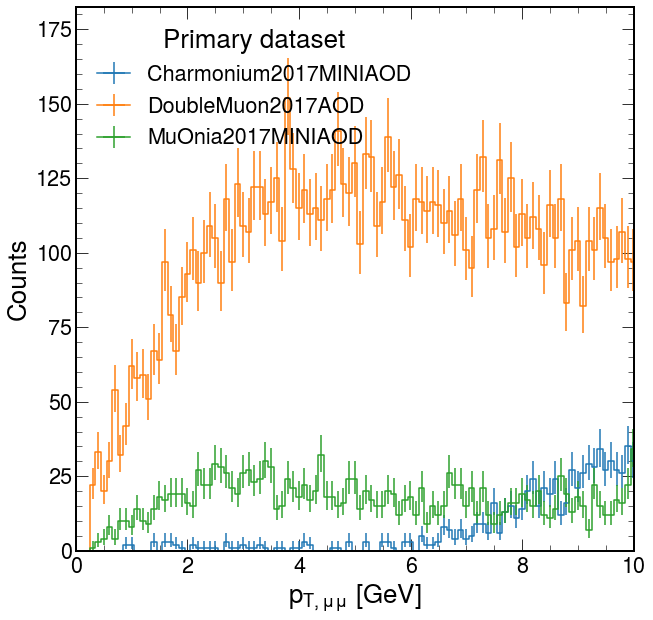

In [4]:
ax = hist.plot1d(output['pt'], overlay='dataset')
ax.set_xlim(0,10)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


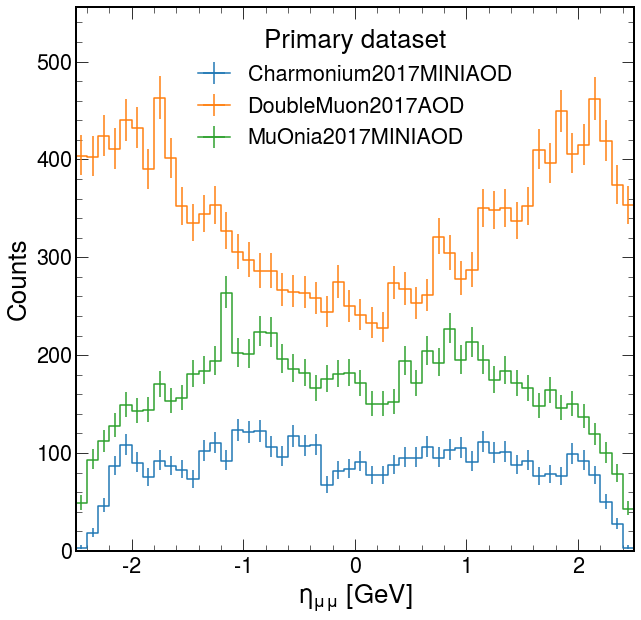

In [5]:
ax= hist.plot1d(output['eta'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


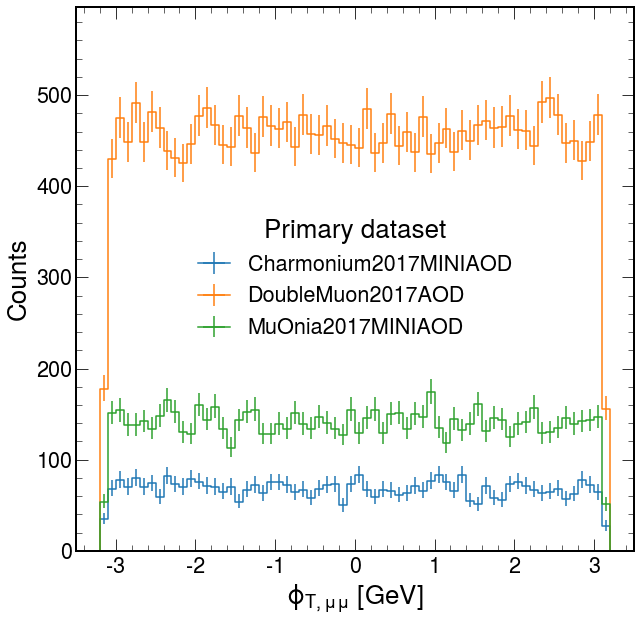

In [6]:
ax= hist.plot1d(output['phi'], overlay='dataset')

In [7]:
print("Events/s:", output['cutflow']['all events']/elapsed, "Time elapsed:", elapsed)
print(output['cutflow'])

Events/s: 8505.165555180014 Time elapsed: 33.5307993888855
defaultdict(<class 'int'>, {'all events': 285185, 'all muons': 1736090, 'soft muon': 1101968, 'global muon': 585703, 'pt cut': 539326, 'eta cut': 538344, 'iso muon': 156620, 'valid vtx': 156610, 'two muons': 44362, 'opposite charge': 42776, 'same vtx': 41576})
